In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from pyentrp import entropy as pyent
import EntropyHub as EH
import neurokit2 as nk
import random
import sampen
import requests
import io
import apache_log_parser
from pprint import pprint
import os
from sklearn import preprocessing
from typing import List
import itertools

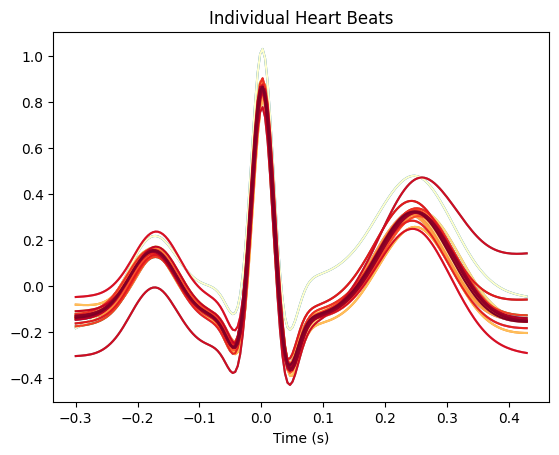

In [5]:
ecg_signal = nk.ecg_simulate(duration=30, sampling_rate=250)
signals, info = nk.ecg_process(ecg_signal, sampling_rate=250)
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]
epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=250, show=True)

In [6]:
epochs

{'1':              Signal  Index Label
 -0.299772 -0.183371    142     1
 -0.295750 -0.178250    143     1
 -0.291728 -0.172980    144     1
 -0.287705 -0.167524    145     1
 -0.283683 -0.161834    146     1
 ...             ...    ...   ...
  0.412157 -0.036419    319     1
  0.416179 -0.039133    320     1
  0.420201 -0.041545    321     1
  0.424223 -0.043703    322     1
  0.428246 -0.045646    323     1
 
 [182 rows x 3 columns],
 '2':              Signal  Index Label
 -0.299772 -0.080953    356     2
 -0.295750 -0.081688    357     2
 -0.291728 -0.082282    358     2
 -0.287705 -0.082704    359     2
 -0.283683 -0.082912    360     2
 ...             ...    ...   ...
  0.412157 -0.202131    533     2
  0.416179 -0.203156    534     2
  0.420201 -0.203842    535     2
  0.424223 -0.204232    536     2
  0.428246 -0.204370    537     2
 
 [182 rows x 3 columns],
 '3':              Signal  Index Label
 -0.299772 -0.175598    569     3
 -0.295750 -0.174330    570     3
 -0.291728 -0

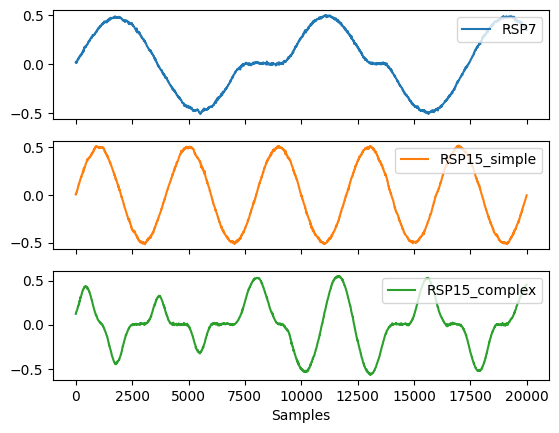

In [4]:
rsp15_sim = nk.rsp_simulate(duration=20, respiratory_rate=15, method="sinusoidal")
rsp15_com = nk.rsp_simulate(duration=20, respiratory_rate=15, method="breathmetrics")
rsp7 = nk.rsp_simulate(duration=20, respiratory_rate=7, method="breathmetrics")

# Visualize respiration rate
rsp_df = pd.DataFrame({"RSP7": rsp7,
                       "RSP15_simple": rsp15_sim,
                       "RSP15_complex": rsp15_com})
nk.signal_plot(rsp_df, subplots=True)

In [9]:
rsp7[:100]

array([0.02028649, 0.02029051, 0.02014867, 0.01980222, 0.01931399,
       0.01869783, 0.01799757, 0.01724306, 0.01640926, 0.0155358 ,
       0.01469794, 0.01388786, 0.01309607, 0.01235083, 0.01180056,
       0.01130597, 0.01103012, 0.01095116, 0.01112404, 0.01155965,
       0.01226399, 0.01331549, 0.01462068, 0.01605477, 0.01758211,
       0.01913232, 0.02057854, 0.02187989, 0.02299197, 0.02372959,
       0.02407685, 0.02396823, 0.02349702, 0.02273993, 0.02175344,
       0.02066887, 0.01955812, 0.01856603, 0.01771033, 0.01713178,
       0.01698432, 0.0172035 , 0.01783688, 0.01880617, 0.02010513,
       0.02156183, 0.02316184, 0.02485052, 0.02659661, 0.02826396,
       0.02988486, 0.03129874, 0.03256071, 0.03368175, 0.03460588,
       0.03537877, 0.03601976, 0.03651913, 0.03684816, 0.03704324,
       0.03709871, 0.03707073, 0.03688892, 0.03660349, 0.03624466,
       0.03587461, 0.03551255, 0.03512054, 0.03475247, 0.03446281,
       0.03425571, 0.03416335, 0.03413769, 0.03426201, 0.03445

In [12]:
def fuzzy_loop(ser: List[float], batch_size = 300) -> List[float]:
    return [nk.entropy_fuzzy(np.array(ser[index:index+batch_size]))[0] for index in range(len(ser[batch_size:]))]

In [13]:
data = rsp7[:1000]
en = fuzzy_loop(data, 50)

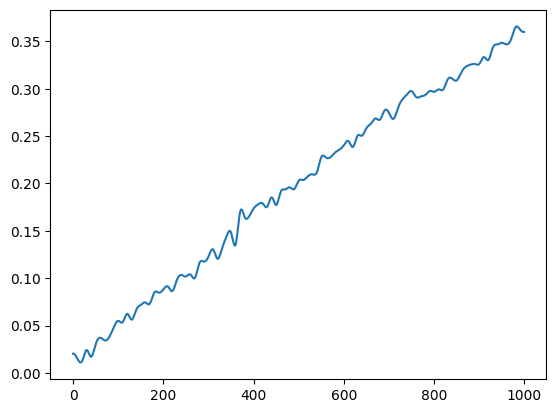

In [14]:
plt.plot(data)

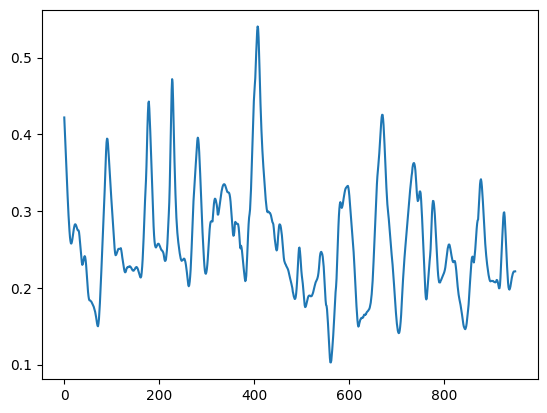

In [15]:
plt.plot(en)